In [27]:
import numpy as np                         # Linear algebra library
import matplotlib.pyplot as plt            # library for visualization
import pandas as pd                        # Data frame library

from sklearn.decomposition import PCA      # PCA library

In [37]:
#np.random.seed(0)
n = 1  # The amount of the correlation
x = np.random.uniform(1,2,1000) # Generate 1000 samples from a uniform random variable
y = x.copy() * n # Make y = n * x

# PCA works better if the data is centered
x = x - np.mean(x) # Center x. Remove its mean
y = y - np.mean(y) # Center y. Remove its mean

df = pd.DataFrame({'x': x, 'y': y}) # Create a data frame with x and y
df.head()

,x,y
0,0.081530,0.081530
1,-0.501286,-0.501286
2,-0.035524,-0.035524
3,0.197420,0.197420
4,-0.467375,-0.467375


# PCA In-Built Function

In [38]:
# Instantiate a PCA. Choose to get 2 output variables
pca = PCA(n_components=2) # If n_components=n, resulting rotatedData will have n columns

# Create the transformation model for this data. 
# Internally, it gets the rotation matrix and the explained variance
pcaTr = pca.fit(df)

# Transform data based on the rotation matrix of pcaTr
rotatedData = pcaTr.transform(df)

# Create df with the new variables PC1 and PC2
dfPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2']) 
display(dfPCA.head())

,PC1,PC2
0,-0.115301,-1.950801e-17
1,0.708926,1.052013e-16
2,0.050238,7.720466e-18
3,-0.279195,-5.616110e-17
4,0.660967,7.878476e-17


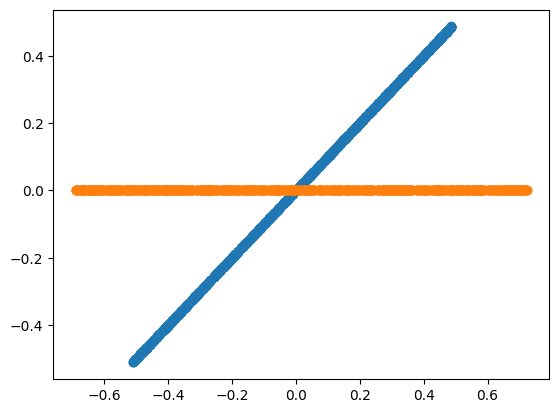

In [39]:
# Plot the original correlated data in blue
plt.scatter(df.x, df.y)

# Plot the transformed data in orange
plt.scatter(dfPCA.PC1, dfPCA.PC2)
plt.show()

# PCA Custom Function

In [41]:
def compute_pca(X, n_components=2):
    """
    Input:
        X: of dimension (m,n) where each row corresponds to a word vector
        n_components: Number of components you want to keep.
    Output:
        X_reduced: data transformed in 2 dims/columns + regenerated original data
    """

    # Mean-normalise the data
    X_demeaned = (X - np.mean(X,axis=0)) / np.std(X,axis=0)

    # Compute covariance matrix
    covariance_matrix = np.cov(X_demeaned, rowvar=False) # Same as np.cov(X_demeaned.T, rowvar=True)
    
    # Compute eigenvectors & eigenvalues of covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eigh(covariance_matrix, UPLO='L')

    # Sort eigenvalue in increasing order (get the indices from the sort)
    idx_sorted = np.argsort(eigen_vals)
    # Reverse order so it's from highest to lowest
    idx_sorted_decreasing = idx_sorted[::-1]

    # Sort eigen values by idx_sorted_decreasing
    eigen_vals_sorted = eigen_vals[idx_sorted_decreasing]
    # Sort eigenvectors using the idx_sorted_decreasing indices
    eigen_vecs_sorted = eigen_vecs[:,idx_sorted_decreasing]

    # Select first n_components of eigenvectors (desired dimension of rescaled array)
    eigen_vecs_subset = eigen_vecs_sorted[:, :n_components]

    # Multiply first n_compoenents of eigenvectors with de-meaned data
    X_reduced = np.matmul(X_demeaned, eigen_vecs_subset)
    
    return X_reduced

# Understanding the transformation model pcaTr

A PCA model is composed of a rotation matrix and its corresponding explained variance.

* `pcaTr.components_` has the rotation matrix 
* `pcaTr.explained_variance_` has the explained variance of each principal component

In [40]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()

print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues or explained variance
[1.78930952e-01 5.40624924e-33]


$cos(45^o) = 0.7071$

The rotation matrix is equal to:

$$R = \begin{bmatrix} cos(45^o) & sin(45^o) \\ -sin(45^o) & cos(45^o) \end{bmatrix}$$ 

$45^o$ is the same angle that form the original variables y = 1 * x.

Since our eigenvectors are arranged descendingly, our principle component matrix get swapped as below:

$$U = \begin{bmatrix} cos(-45^o) & sin(-45^o) \\ -sin(-45^o) & cos(-45^o) \end{bmatrix} = \begin{bmatrix} cos(45^o) & -sin(45^o) \\ sin(45^o) & cos(45^o) \end{bmatrix} $$ 

Explained Variance is around [0.166 0]. Recall that the variance of a uniform random variable x ~ U(1, 2), as our x and y, is equal to:

$$Var(x) = \frac {(2 - 1)^2}{12} = 0.083333$$
    
Then the explained variance given by the PCA can be interpret as

$$[Var(x) + Var(y),  \ 0] = [0.0833 + 0.0833, \ 0] = [0.166, \ 0]$$

Which means that all the explained variance of our new system is explained by our first principal component. 
